# Pandas

This notebook covers a _lot_, go through it carefully and _read_ the code. Then work on _understanding_ it. Then apply it to your data set. Then once you've done that, you'll probably _actually_ understand it.

Messing about with the [NSW Penalty data](http://www.osr.nsw.gov.au/sites/default/files/file_manager/penalty_data_set_0.csv)

# Pandas

This notebook covers a _lot_, go through it carefully and _read_ the code. Then work on _understanding_ it. Then apply it to your data set. Then once you've done that, you'll probably _actually_ understand it.

Messing about with the [NSW Penalty data](http://www.osr.nsw.gov.au/sites/default/files/file_manager/penalty_data_set_0.csv)

`imports`, you've seen this before!

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
from datetime import datetime
import geopandas as gpd
import geopandas as gp
import shapely
import fiona


shp_file_name = "/Users/sylvia/Downloads/GDA2020/nsw_localities.shp"
zip_file_name = "nsw_locality_polygon_shp.zip"
web_file_path = (
    "https://data.gov.au/data/dataset/"
    "91e70237-d9d1-4719-a82f-e71b811154c6/resource/"
    "5e295412-357c-49a2-98d5-6caf099c2339/download/"
    "nsw_locality_polygon_shp.zip"
)
if __name__ == "__main__":
    saved_style_state = plt.rcParams.copy()
    if os.path.isfile("../set9/trees-with-species-and-dimensions-urban-forest.csv"):
        filepath = "../set9/trees-with-species-and-dimensions-urban-forest.csv"
        print("Loading from file")
    else:
        filepath = "http://www.osr.nsw.gov.au/sites/default/files/file_manager/penalty_data_set_0.csv"
        print("Loading from the internet")


Loading from the internet


Some magic that tells jupyter to put graphs and things in the notebook instead of the default behaviour which is to save it as a file.

In [11]:
%matplotlib inline

Set the size of the plots that will come out when we ask for them. Annoyingly, these are in inches. Whatever an "inch" is

In [12]:
plt.rcParams["figure.figsize"] = (10, 5)


In [13]:
saved_style_state = matplotlib.rcParams.copy()  # give us a style state to go back to


Let's check to see if we've already downloaded the data. It's a big file, so we don't want to do it every time we run the code. Even just loading from file takes a few seconds!

Pandas is pretty smart, it can get data from the internet just as easily as from the file system, it just takes a bit longer.


In [14]:
if os.path.isfile("trees-with-species-and-dimensions-urban-forest.csv"):
    filepath = "trees-with-species-and-dimensions-urban-forest.csv"
    print("loading from file")
else:
    filepath = "http://www.osr.nsw.gov.au/sites/default/files/file_manager/penalty_data_set_0.csv"
    print("loading from the internet")

tdf = pd.read_csv(filepath)
print("done")
#Research Question: What factors influence the size of Diameter Breast Height (DBH) of trees in Melbourne?

loading from file
done


In [15]:
tdf.head()

,CoM ID,Common Name,Scientific Name,Genus,Family,Diameter Breast Height,Year Planted,Date Planted,Age Description,Useful Life Expectency,Useful Life Expectency Value,Precinct,Located in,UploadDate,CoordinateLocation,Latitude,Longitude,Easting,Northing,geolocation
0,1029241,London Plane,Platanus x acerifolia,Platanus,Platanaceae,59.0,1997,12/4/1997,Mature,6-10 years (>50% canopy),10.0,NaN,Street,1/10/2021,"-37.834844802361296, 144.97624052189326",-37.834845,144.976240,321912.33,5810579.39,"-37.834844802361296, 144.97624052189326"
1,1357481,Cyprus Plane,Platanus orientalis,Platanus,Platanaceae,8.0,2008,3/12/2008,Juvenile,61+ years,80.0,NaN,Park,1/10/2021,"-37.82112379777012, 144.97204161951672",-37.821124,144.972042,321509.73,5812093.94,"-37.82112379777012, 144.97204161951672"
2,1022615,Spotted Gum,Corymbia maculata,Corymbia,Myrtaceae,73.0,1997,11/10/1997,Mature,31-60 years,60.0,NaN,Street,1/10/2021,"-37.800407968829234, 144.9624661325885",-37.800408,144.962466,320616.72,5814374.35,"-37.800407968829234, 144.9624661325885"
3,1584225,Mexican or Washington Palm,Washingtonia robusta,Washingtonia,Arecaceae,NaN,2015,6/19/2015,NaN,NaN,NaN,NaN,Street,1/10/2021,"-37.79745710207531, 144.94549656713158",-37.797457,144.945497,319115.37,5814669.08,"-37.79745710207531, 144.94549656713158"
4,1042546,Golden Wattle,Acacia pycnantha,Acacia,Fabaceae,NaN,1998,11/20/1998,NaN,NaN,NaN,NaN,Park,1/10/2021,"-37.79378928167871, 144.9536986384697",-37.793789,144.953699,319828.67,5815091.93,"-37.79378928167871, 144.9536986384697"


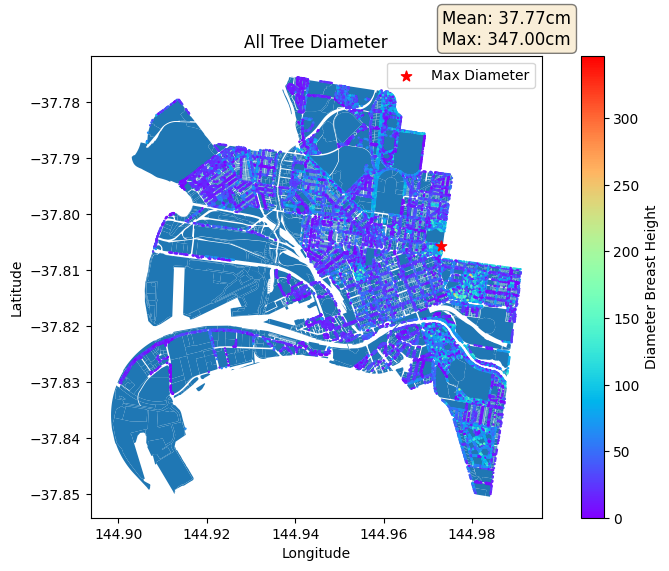

In [30]:
fig0 = plt.figure(figsize=(10, 6), num=1)
fig0_ax1 = fig0.add_subplot(111)
mel_prop = gpd.read_file("boundaries/property-boundaries/property-boundaries.shp")
if mel_prop.crs != "EPSG:4326":
        mel_prop = mel_prop.to_crs("EPSG:4326")
mel_prop.plot(ax=fig0_ax1)
scatter = fig0_ax1.scatter(tdf["Longitude"], tdf["Latitude"],
                               c=tdf["Diameter Breast Height"],
                               cmap="rainbow", s=0.5)
tree_dia_mean = tdf["Diameter Breast Height"].mean()
tree_dia_max = tdf["Diameter Breast Height"].max()
street_max_items = tdf[tdf["Diameter Breast Height"] == tree_dia_max]
fig0_ax1.scatter(street_max_items["Longitude"], street_max_items["Latitude"],
                     c='red', marker="*", s=60, label="Max Diameter")
text_str = f'Mean: {tree_dia_mean:.2f}cm\nMax: {tree_dia_max:.2f}cm'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
fig0_ax1.text(0.78, 1.1, text_str, transform=fig0_ax1.transAxes, fontsize=12,
                  verticalalignment='top', bbox=props)
fig0_ax1.set_title("All Tree Diameter")
fig0_ax1.set_xlabel("Longitude")
fig0_ax1.set_ylabel("Latitude")
fig0_ax1.legend()
cbar = plt.colorbar(scatter, ax=fig0_ax1)
cbar.set_label('Diameter Breast Height')
plt.show()

['Street' 'Park' nan]


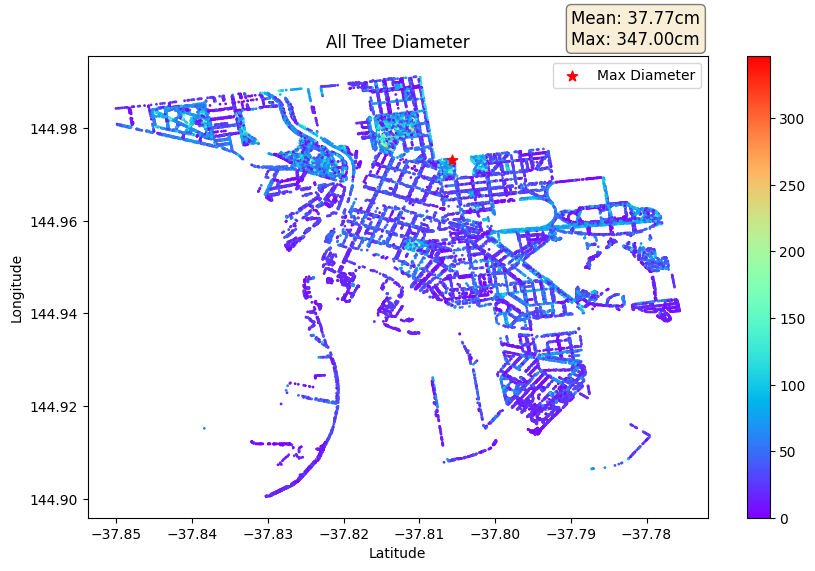

In [7]:
fig0 = plt.figure(figsize=(10, 6), num=1)
fig0_ax1 = fig0.add_subplot(111)
fig0_ax1_sc1 = fig0_ax1.scatter(tdf["Latitude"], tdf["Longitude"],
                                c=tdf["Diameter Breast Height"],
                                cmap="rainbow", s=1)
tree_dia_mean = tdf["Diameter Breast Height"].mean()
tree_dia_max = tdf["Diameter Breast Height"].max()
street_max_items = tdf[(tdf["Diameter Breast Height"]) == tree_dia_max]
fig0_ax1.scatter(street_max_items["Latitude"], street_max_items["Longitude"], c='red', marker="*", s=60,
                 label="Max Diameter")
text_str = f'Mean: {tree_dia_mean:.2f}cm\nMax: {tree_dia_max:.2f}cm'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
fig0_ax1.text(0.78, 1.1, text_str, transform=fig0_ax1.transAxes, fontsize=12,
              verticalalignment='top', bbox=props)
fig0_ax1.set_title("All Tree Diameter")
fig0_ax1.set_xlabel("Latitude")
fig0_ax1.set_ylabel("Longitude")
fig0_ax1.legend()
fig0.colorbar(fig0_ax1_sc1, ax=fig0_ax1)

location_type = tdf["Located in"].unique()
print(location_type)
#Diameter Breast Height (DBH) size analysis of all trees in Melbourne.

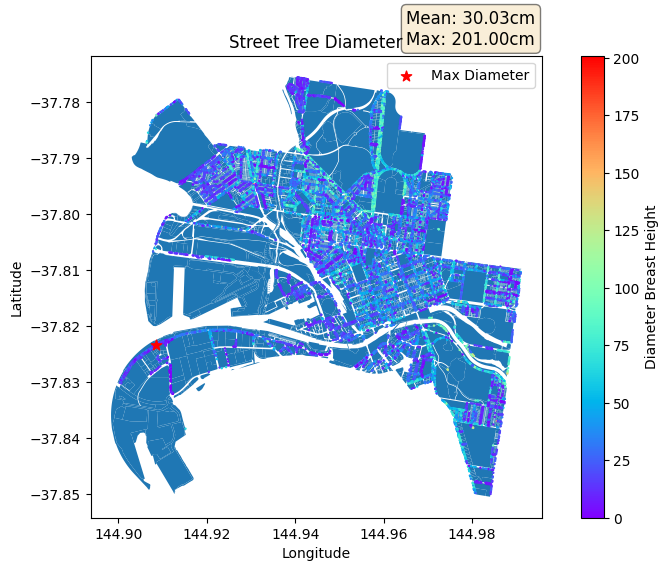

In [33]:
tdf_street = tdf.loc[(tdf["Located in"] == "Street")]
fig1 = plt.figure(figsize=(10, 6), num=2)
fig1_ax1 = fig1.add_subplot(111)
mel_prop = gpd.read_file("boundaries/property-boundaries/property-boundaries.shp")
if mel_prop.crs != "EPSG:4326":
        mel_prop = mel_prop.to_crs("EPSG:4326")
mel_prop.plot(ax=fig1_ax1)
scatter = fig1_ax1.scatter(tdf_street["Longitude"], tdf_street["Latitude"],
                                c=tdf_street["Diameter Breast Height"],
                                cmap="rainbow", s=0.5)
street_tree_dia_mean = tdf_street["Diameter Breast Height"].mean()
street_tree_dia_max = tdf_street["Diameter Breast Height"].max()
street_max_items = tdf_street[(tdf_street["Diameter Breast Height"]) == street_tree_dia_max]
fig1_ax1.scatter(street_max_items["Longitude"], street_max_items["Latitude"], c='red', marker="*", s=60,
                    label="Max Diameter")
text_str = f'Mean: {street_tree_dia_mean:.2f}cm\nMax: {street_tree_dia_max:.2f}cm'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
fig1_ax1.text(0.70, 1.1, text_str, transform=fig1_ax1.transAxes, fontsize=12,
                verticalalignment='top', bbox=props)
fig1_ax1.set_title("Street Tree Diameter")
fig1_ax1.set_ylabel("Latitude")
fig1_ax1.set_xlabel("Longitude")
fig1_ax1.legend()
cbar = plt.colorbar(scatter, ax=fig1_ax1)
cbar.set_label('Diameter Breast Height')
plt.show()

#Diameter Breast Height (DBH) Size Analysis of Street Trees.

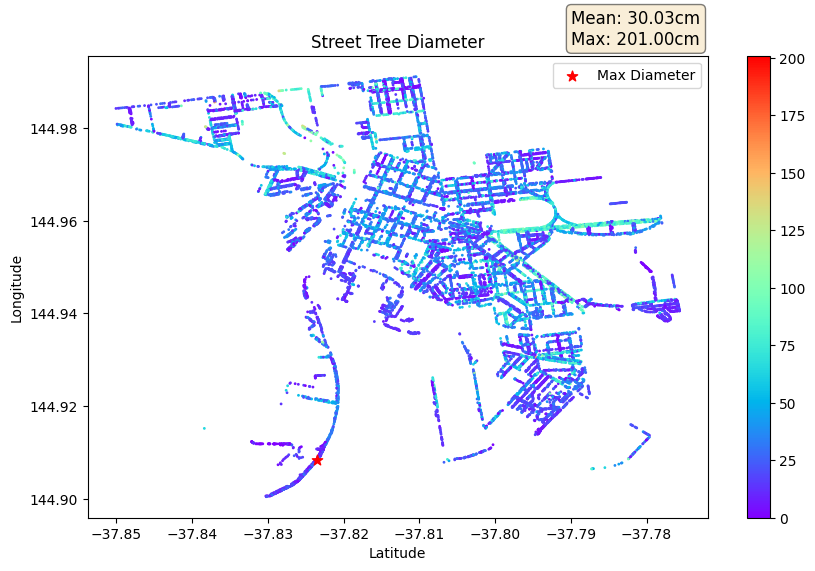

In [8]:
tdf_street = tdf.loc[(tdf["Located in"] == "Street")]
fig1 = plt.figure(figsize=(10, 6), num=2)
fig1_ax1 = fig1.add_subplot(111)
fig1_ax1_sc1 = fig1_ax1.scatter(tdf_street["Latitude"], tdf_street["Longitude"],
                                c=tdf_street["Diameter Breast Height"],
                                cmap="rainbow", s=1)
street_tree_dia_mean = tdf_street["Diameter Breast Height"].mean()
street_tree_dia_max = tdf_street["Diameter Breast Height"].max()
street_max_items = tdf_street[(tdf_street["Diameter Breast Height"]) == street_tree_dia_max]
fig1_ax1.scatter(street_max_items["Latitude"], street_max_items["Longitude"], c='red', marker="*", s=60,
                    label="Max Diameter")
text_str = f'Mean: {street_tree_dia_mean:.2f}cm\nMax: {street_tree_dia_max:.2f}cm'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
fig1_ax1.text(0.78, 1.1, text_str, transform=fig1_ax1.transAxes, fontsize=12,
                verticalalignment='top', bbox=props)
fig1_ax1.set_title("Street Tree Diameter")
fig1_ax1.set_xlabel("Latitude")
fig1_ax1.set_ylabel("Longitude")
fig1_ax1.legend()
fig1.colorbar(fig1_ax1_sc1, ax=fig1_ax1)
#Diameter Breast Height (DBH) Size Analysis of Street Trees.

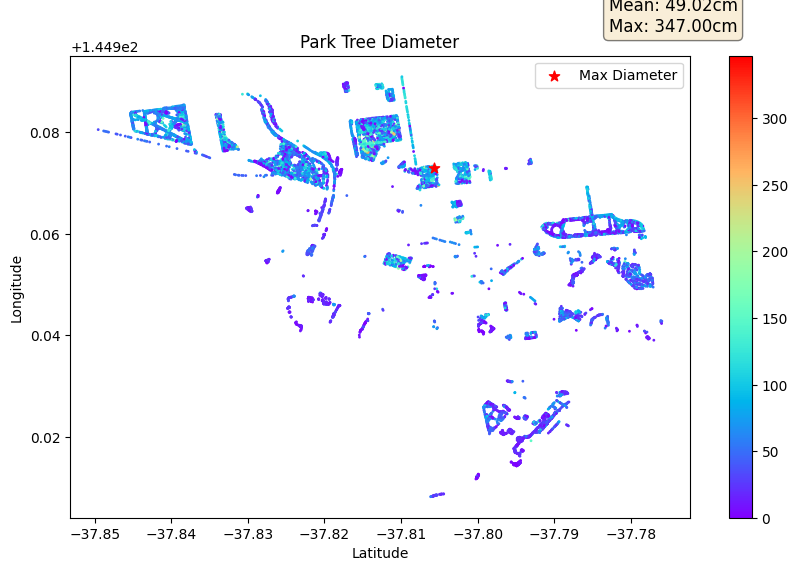

In [9]:
tdf_park = tdf.loc[(tdf["Located in"] == "Park")]
fig2 = plt.figure(figsize=(10, 6), num=3)
fig2_ax1 = fig2.add_subplot(111)
fig2_ax1_sc1 = fig2_ax1.scatter(tdf_park["Latitude"], tdf_park["Longitude"],
                                c=tdf_park["Diameter Breast Height"],
                                cmap="rainbow", s=1)
park_tree_dia_mean = tdf_park["Diameter Breast Height"].mean()
park_tree_dia_max = tdf_park["Diameter Breast Height"].max()
park_max_items = tdf_park[(tdf_park["Diameter Breast Height"]) == park_tree_dia_max]
fig2_ax1.scatter(park_max_items["Latitude"], park_max_items["Longitude"], c='red', marker="*", s=60,
                    label="Max Diameter")
text_str = f'Mean: {park_tree_dia_mean:.2f}cm\nMax: {park_tree_dia_max:.2f}cm'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
fig2_ax1.text(0.78, 1.1, text_str, transform=fig1_ax1.transAxes, fontsize=12,
                verticalalignment='top', bbox=props)
fig2_ax1.set_title("Park Tree Diameter")
fig2_ax1.set_xlabel("Latitude")
fig2_ax1.set_ylabel("Longitude")
fig2_ax1.legend()
fig2.colorbar(fig2_ax1_sc1, ax=fig2_ax1)
#Diameter Breast Height (DBH) Size Analysis of Park Trees.

In [10]:
tdf_park.loc[tdf_park["Diameter Breast Height"].idxmax()]

CoM ID                                                         1036933
Common Name                                            Moreton Bay Fig
Scientific Name                                      Ficus macrophylla
Genus                                                            Ficus
Family                                                        Moraceae
Diameter Breast Height                                           347.0
Year Planted                                                      1998
Date Planted                                                1998-10-29
Age Description                                                 Mature
Useful Life Expectency                                     21-30 years
Useful Life Expectency Value                                      30.0
Precinct                                                           NaN
Located in                                                        Park
UploadDate                                                  2021-01-10
Coordi

Here's the fattest tree in a park in melboune!

![](park_tree.png)


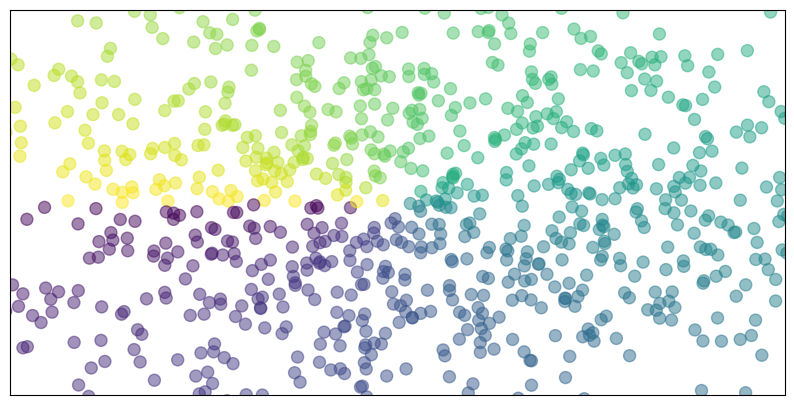

In [12]:
n= 1024 #n=number
X= np.random.normal(0, 1, n)
Y= np.random.normal(0, 1, n)
T= np.arctan2(Y, X)# for color value

plt.scatter(X, Y, s=75, c=T, alpha=0.5) #s=size c=solor
#plt.scatter(np.arange(5), np.arange(5))

plt.xlim((-1.5, 1.5))
plt.ylim((-1.5,1.5))
plt.xticks(())
plt.yticks(()) #remove axies


plt.show()

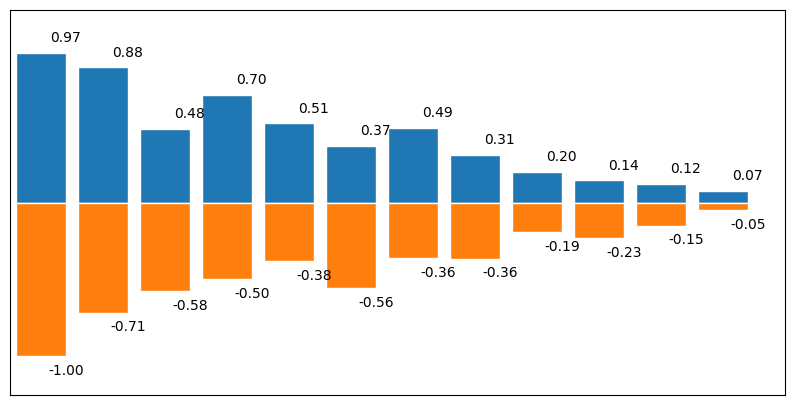

In [13]:
n=12
X = np.arange(n)
Y1 = (1 - X/float(n))*np.random.uniform(0.5,1.0,n)
Y2 = (1 - X/float(n))*np.random.uniform(0.5,1.0,n)

plt.bar(X,+Y1, edgecolor='white')
plt.bar(X,-Y2, edgecolor='white')

for x, y in zip(X, Y1): #only add zip, can export 2 value
    plt.text(x+ 0.4, y+0.05, '%.2f' % y, ha='center', va='bottom' ) #ha: horizontal alignment

for x, y in zip(X, Y2): #only add zip, can export 2 value
    plt.text(x+ 0.4, -y-0.05, '-%.2f' % y, ha='center', va='top' ) 
plt.xlim(-.5,n)
plt.xticks(())
plt.ylim(-1.25, 1.25)
plt.yticks(())

plt.show()

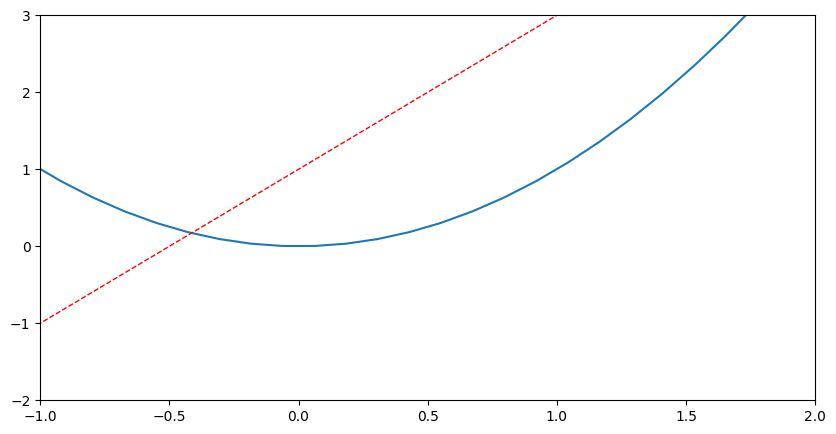

In [14]:
x = np.linspace(-3,3,50)
y1=2*x+1
y2=x**2

plt.figure()
plt.plot(x,y2)
plt.plot(x, y1, color='red', linewidth=1.0, linestyle='--')

plt.xlim((-1,2)) #get value of range in x axis
plt.ylim((-2,3))

plt.show()

Text(0, 0.5, 'Mean Diameter')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

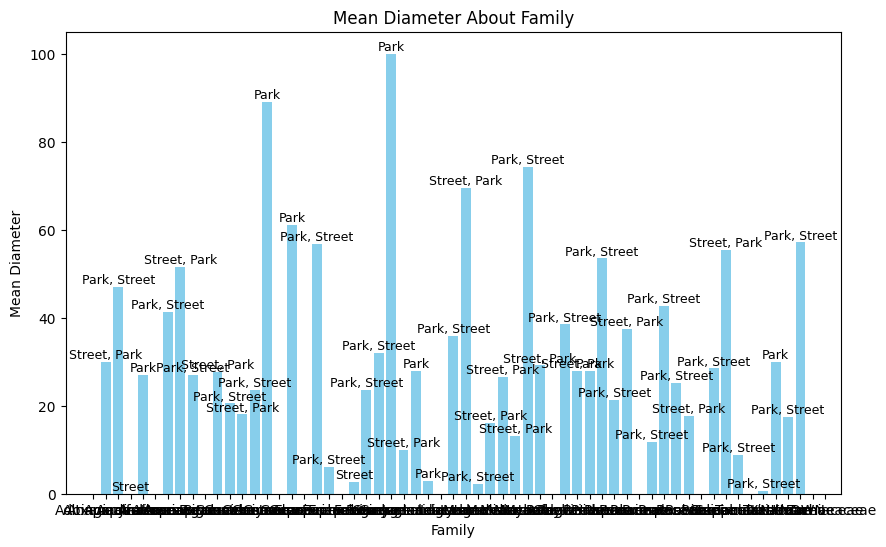

In [15]:
family_mean_diameter = tdf.groupby("Family")["Diameter Breast Height"].mean()
locations = tdf.groupby("Family")["Located in"].apply(lambda x: ', '.join(map(str, x.dropna().unique())))
family = family_mean_diameter.index
mean_diameter = family_mean_diameter.values
fig3 = plt.figure(figsize=(10, 6), num=4)
fig3_ax1 = fig3.add_subplot(111)
bars = fig3_ax1.bar(family, mean_diameter, color="skyblue")
for bar, location in zip(bars, locations):
        y_val = bar.get_height()
        fig3_ax1.text(bar.get_x() + bar.get_width() / 2, y_val + 0.1, location, ha='center', va='bottom', fontsize=9)
fig3_ax1.set_title("Mean Diameter About Family")
fig3_ax1.set_xlabel("Family")
fig3_ax1.set_ylabel("Mean Diameter")

#Influence of Plant Subjects on Plant Diameter Breast Height (DBH)


/var/folders/w_/h6lh6wr515z2ry3b9mdk_7sr0000gn/T/ipykernel_7568/3118897371.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_diameter_by_bin = tdf.groupby('Latitude_Bin')["Diameter Breast Height"].mean()


Text(0, 0.5, 'Mean Diameter')

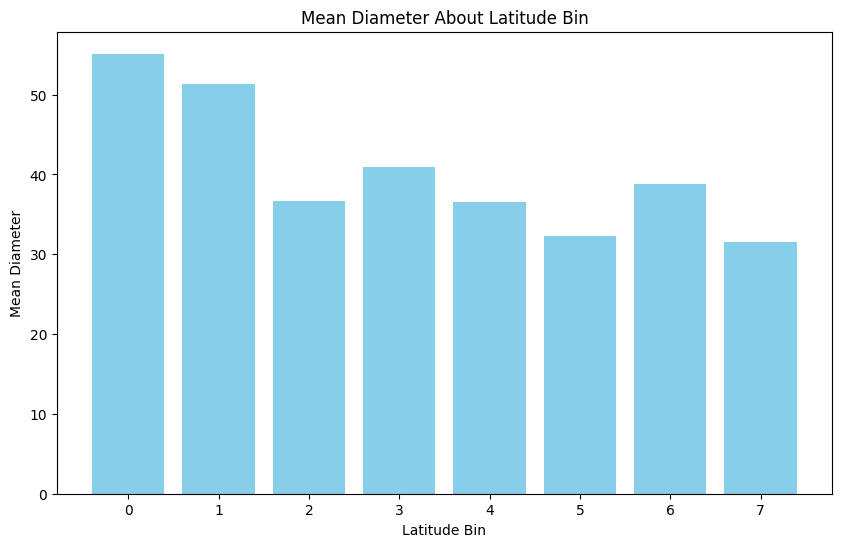

In [13]:
fig4 = plt.figure(figsize=(10, 6), num=5)
fig4_ax1 = fig4.add_subplot(111)
bin_width = 0.01
bins = np.arange(tdf["Latitude"].min(), tdf["Latitude"].max() + bin_width, bin_width)
tdf['Latitude_Bin'] = pd.cut(tdf["Latitude"], bins=bins)
mean_diameter_by_bin = tdf.groupby('Latitude_Bin')["Diameter Breast Height"].mean()
categories = mean_diameter_by_bin.index
values = mean_diameter_by_bin.values
x_labels = [f'{interval.left:.2f} to {interval.right:.2f}' for interval in categories]
x = range(len(categories))
fig4_ax1.bar(x, values, color='skyblue')
fig4_ax1.set_title("Mean Diameter About Latitude Bin")
fig4_ax1.set_xlabel("Latitude Bin")
fig4_ax1.set_ylabel("Mean Diameter")
#Effect of Latitude on the Size of Diameter Breast Height (DBH) in Plants.

/var/folders/w_/h6lh6wr515z2ry3b9mdk_7sr0000gn/T/ipykernel_7568/1487373819.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_diameter_by_bin = tdf.groupby('Longitude_Bin')["Diameter Breast Height"].mean()


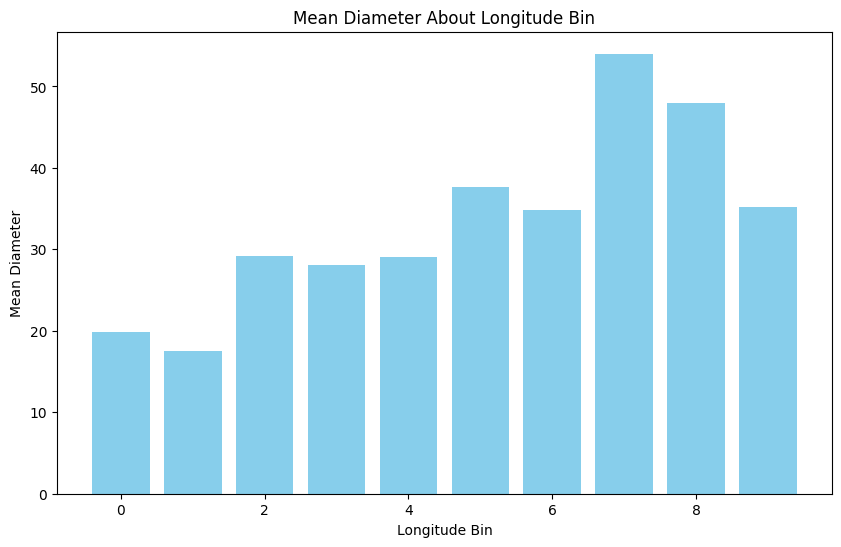

In [14]:
fig5 = plt.figure(figsize=(10, 6), num=6)
fig5_ax1 = fig5.add_subplot(111)
bin_width = 0.01
bins = np.arange(tdf["Longitude"].min(), tdf["Longitude"].max() + bin_width, bin_width)
tdf['Longitude_Bin'] = pd.cut(tdf["Longitude"], bins=bins)
mean_diameter_by_bin = tdf.groupby('Longitude_Bin')["Diameter Breast Height"].mean()
categories = mean_diameter_by_bin.index
values = mean_diameter_by_bin.values
x_labels = [f'{interval.left:.2f} to {interval.right:.2f}' for interval in categories]
x = range(len(categories))
fig5_ax1.bar(x, values, color='skyblue')
fig5_ax1.set_title("Mean Diameter About Longitude Bin")
fig5_ax1.set_xlabel("Longitude Bin")
fig5_ax1.set_ylabel("Mean Diameter")

plt.show()
#Effect of Longitude on the Size of Diameter Breast Height (DBH) in Plants.

In [14]:
tdf.head()


,CoM ID,Common Name,Scientific Name,Genus,Family,Diameter Breast Height,Year Planted,Date Planted,Age Description,Useful Life Expectency,...,Located in,UploadDate,CoordinateLocation,Latitude,Longitude,Easting,Northing,geolocation,Latitude_Bin,Longitude_Bin
0,1029241,London Plane,Platanus x acerifolia,Platanus,Platanaceae,59.0,1997,1997-12-04,Mature,6-10 years (>50% canopy),...,Street,2021-01-10,"-37.834844802361296, 144.97624052189326",-37.834845,144.976241,321912.33,5810579.39,"-37.834844802361296, 144.97624052189326","(-37.841, -37.831]","(144.97, 144.98]"
1,1357481,Cyprus Plane,Platanus orientalis,Platanus,Platanaceae,8.0,2008,2008-03-12,Juvenile,61+ years,...,Park,2021-01-10,"-37.82112379777012, 144.97204161951672",-37.821124,144.972042,321509.73,5812093.94,"-37.82112379777012, 144.97204161951672","(-37.831, -37.821]","(144.97, 144.98]"
2,1022615,Spotted Gum,Corymbia maculata,Corymbia,Myrtaceae,73.0,1997,1997-11-10,Mature,31-60 years,...,Street,2021-01-10,"-37.800407968829234, 144.9624661325885",-37.800408,144.962466,320616.72,5814374.35,"-37.800407968829234, 144.9624661325885","(-37.801, -37.791]","(144.96, 144.97]"
3,1584225,Mexican or Washington Palm,Washingtonia robusta,Washingtonia,Arecaceae,NaN,2015,2015-06-19,NaN,NaN,...,Street,2021-01-10,"-37.79745710207531, 144.94549656713158",-37.797457,144.945497,319115.37,5814669.08,"-37.79745710207531, 144.94549656713158","(-37.801, -37.791]","(144.94, 144.95]"
4,1042546,Golden Wattle,Acacia pycnantha,Acacia,Fabaceae,NaN,1998,1998-11-20,NaN,NaN,...,Park,2021-01-10,"-37.79378928167871, 144.9536986384697",-37.793789,144.953699,319828.67,5815091.93,"-37.79378928167871, 144.9536986384697","(-37.801, -37.791]","(144.95, 144.96]"


`dataframe.head()` gives the top 5 rows, if it was `dataframe.head(3)` it would give the top 3 rows. 

`dataframe.sample(5)` gives you 5 random rows from your dataframe. It's a good way to avoid the trap where you confuse yourself the first few rows are odd.

In [15]:
tdf.sample(5)


,CoM ID,Common Name,Scientific Name,Genus,Family,Diameter Breast Height,Year Planted,Date Planted,Age Description,Useful Life Expectency,...,Located in,UploadDate,CoordinateLocation,Latitude,Longitude,Easting,Northing,geolocation,Latitude_Bin,Longitude_Bin
34011,1027674,Golden Elm,Ulmus glabra,Ulmus,Ulmaceae,NaN,1900,2000-02-01,NaN,NaN,...,Park,2021-01-10,"-37.820971969591575, 144.9703796417387",-37.820972,144.970380,321363.07,5812107.61,"-37.820971969591575, 144.9703796417387","(-37.831, -37.821]","(144.96, 144.97]"
67766,1358593,Spotted Gum,Corymbia maculata,Corymbia,Myrtaceae,25.0,2009,2009-04-07,Semi-Mature,61+ years,...,Street,2021-01-10,"-37.821001416149414, 144.95227155250515",-37.821001,144.952272,319769.19,5812069.55,"-37.821001416149414, 144.95227155250515","(-37.831, -37.821]","(144.95, 144.96]"
39257,1524292,Lightwood Wattle,Acacia implexa,Acacia,Fabaceae,NaN,2013,2013-01-22,NaN,NaN,...,Park,2021-01-10,"-37.78354463556781, 144.94464356073775",-37.783545,144.944644,319006.31,5816211.24,"-37.78354463556781, 144.94464356073775","(-37.791, -37.781]","(144.94, 144.95]"
49077,1764178,Sweet Bursaria,Bursaria spinosa,Bursaria,Pittosporaceae,NaN,2019,2019-06-18,NaN,NaN,...,Street,2021-01-10,"-37.80286587482247, 144.92610007964973",-37.802866,144.926100,317420.78,5814031.16,"-37.80286587482247, 144.92610007964973","(-37.811, -37.801]","(144.92, 144.93]"
25454,1522962,Drooping sheoak,Allocasuarina verticillata,Allocasuarina,Casuarinaceae,NaN,2013,2013-01-22,NaN,NaN,...,Park,2021-01-10,"-37.781880698746875, 144.94345599391806",-37.781881,144.943456,318897.66,5816393.58,"-37.781880698746875, 144.94345599391806","(-37.791, -37.781]","(144.94, 144.95]"


We can also get the list of columns out of the data frame

In [16]:
tdf.columns

Index(['CoM ID', 'Common Name', 'Scientific Name', 'Genus', 'Family',
       'Diameter Breast Height', 'Year Planted', 'Date Planted',
       'Age Description', 'Useful Life Expectency',
       'Useful Life Expectency Value', 'Precinct', 'Located in', 'UploadDate',
       'CoordinateLocation', 'Latitude', 'Longitude', 'Easting', 'Northing',
       'geolocation', 'Latitude_Bin', 'Longitude_Bin'],
      dtype='object')

This is useful for you when you are documenting your dataset, you can make each column a heading, and then describe that column's characteristics.

You can't index a row directly, you need to use the `iloc` property. That means the _interger location_, so the zeroeth row would be `df.iloc[0]`. 

This gives us the row as a _Series_.

↓

In [17]:
row_one = tdf.iloc[1]
row_one


CoM ID                                                         1357481
Common Name                                               Cyprus Plane
Scientific Name                                    Platanus orientalis
Genus                                                         Platanus
Family                                                     Platanaceae
Diameter Breast Height                                             8.0
Year Planted                                                      2008
Date Planted                                                2008-03-12
Age Description                                               Juvenile
Useful Life Expectency                                       61+ years
Useful Life Expectency Value                                      80.0
Precinct                                                           NaN
Located in                                                        Park
UploadDate                                                  2021-01-10
Coordi

Series objects are _very_ similar to dictionaries. They have more properties though.

In [18]:
row_one["Common Name"]

'Cyprus Plane'

You can access them like a dictionary ☝ or you can access them like a property 👇. 

I like the `my_series.key_name` best, but it won't work if there are spaces in your column title. That can happen if you are getting the data from somewhere else (i.e. you didn't make it).

In [19]:
row_one.Genus

'Platanus'

Doing the same thing on a dataframe gives us the whole column

In [20]:
tdf.Family

0          Platanaceae
1          Platanaceae
2            Myrtaceae
3            Arecaceae
4             Fabaceae
             ...      
76923       Proteaceae
76924         Ulmaceae
76925      Platanaceae
76926    Casuarinaceae
76927        Myrtaceae
Name: Family, Length: 76928, dtype: object

<Axes: >

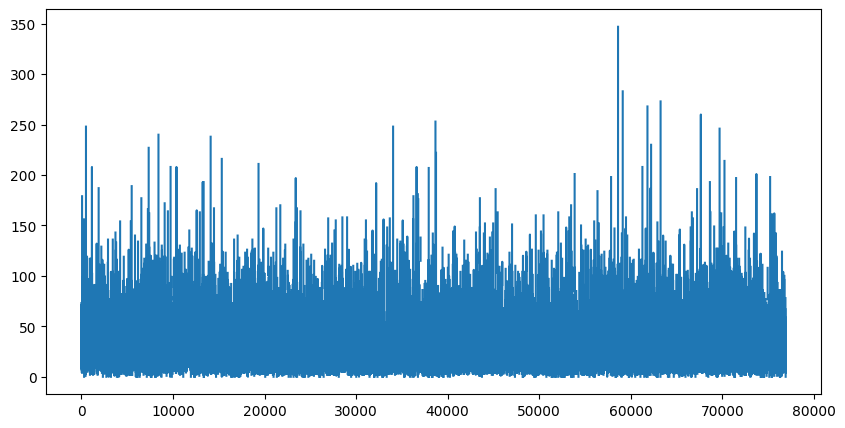

In [21]:
tdf["Diameter Breast Height"].plot()

If we do a simple `plot` on this column we get a pretty dense, but useless graph. It much better one would be a histogram.

<Axes: >

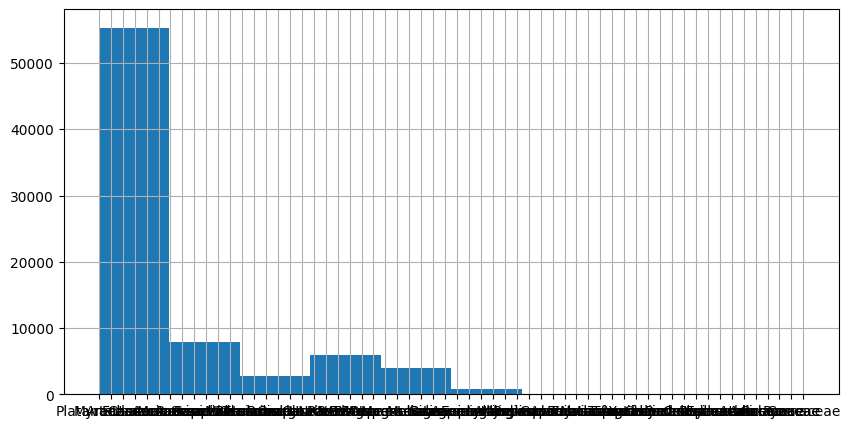

In [22]:
tdf.Family.hist()

The problem we have now is that almost _all_ fines are less than $2000, but there's a very long tail that fills up the right of the graph.

Let's exclude all the values above $3000, and see what it looks like.

We can do that with a nice feature of pandas, _boolean indexing_:

<Axes: >

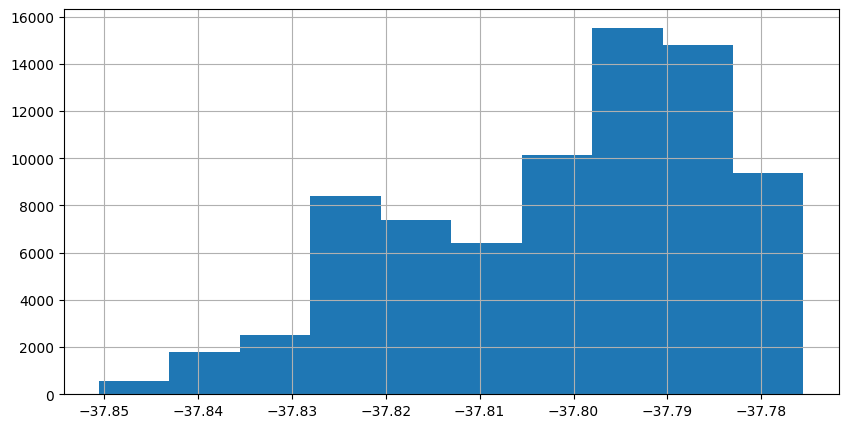

In [23]:
tdf.Latitude[tdf.Latitude < 3000].hist()


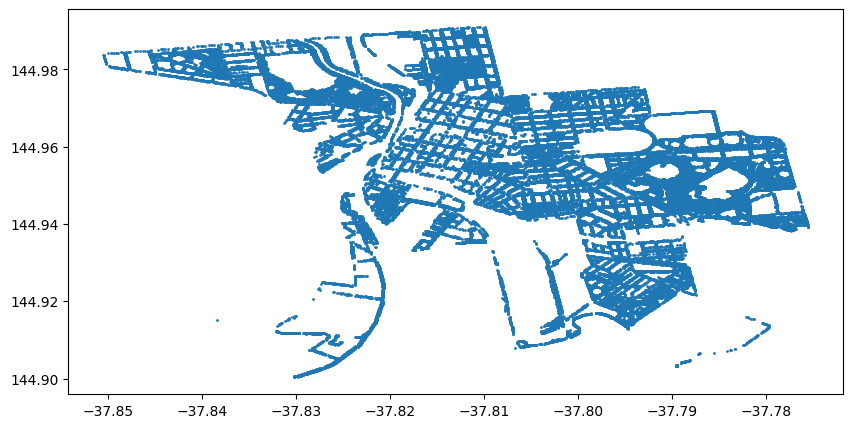

In [24]:
plt.scatter(tdf.Latitude, tdf.Longitude, s=1)

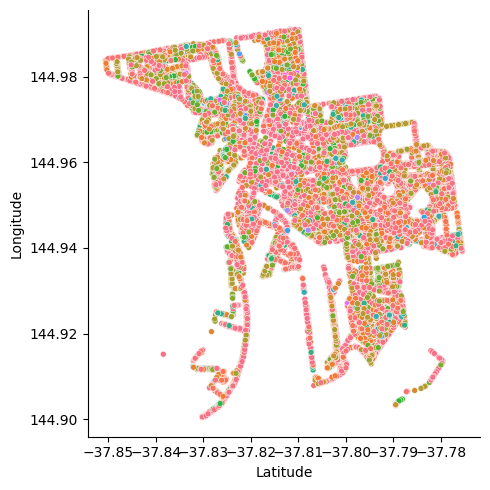

In [25]:
sns.relplot(data=tdf, x='Latitude', y='Longitude', hue='Common Name', size=1, legend=False)
plt.show()

That's pretty crazy/powerful, so let's see that happen a bit more clearly.

We'll make our own series and call it  `some_numbers`

Let's give it the values 0-99 

In [27]:
# Note the capital S, I have no idea why they did that!
# but if you get an `AttributeError: 'module' object has no attribute 'series'` error...
#                 v
some_numbers = pd.Series(range(20))
some_numbers.head()


0    0
1    1
2    2
3    3
4    4
dtype: int64

We can use boolean indexing to get just the values that are less than 8

In [ ]:
some_numbers[some_numbers < 8]

Or we can be fancy and get the numbers that are less than 4 _or_ more than 97:

In [ ]:
some_numbers[(some_numbers < 4) | (some_numbers >= 97)]
# this needs the round brackets, not really sure why.


We can be _really fancy_ too!  Allow me to introduce the:

# 🎺 List comprehension 🎺

This needs to resolve to a list of booleans that matches the list of inputs. It's filtering only for values that are True.

If we use a list comprehension then we can do almost anything we like!

In [ ]:
pets = ["Dog", "Goat", "pig", "Sheep", "Cattle", "Zebu", "Cat", "Chicken", "Guinea pig",             
        "Donkey", "duck", "Water buffalo", "Western honey bee", "dromedary camel", "Horse", 
        "silkmoth", "pigeon", "goose", "Yak", "Bactrian camel", "Llama", "Alpaca",   
        "guineafowl", "Ferret", "muscovy duck", "Barbary dove", "Bali cattle", "Gayal",
        "turkey", "Goldfish", "rabbit", "Koi", "canary", "Society finch", "Fancy mouse",
        "Siamese fighting fish", "Fancy rat and Lab rat", "mink", "red fox", "hedgehog",
        "Guppy"]

pets_series = pd.Series(pets)
pattern_of_bools = [("n" in pet_name) for pet_name in pets_series]
print("pattern:",pattern_of_bools)

pets_series[pattern_of_bools]

_Note: the first `in` means a different thing to the second `in`. I was wondering if I should leave this out, but it's probably good to expose you to strange stuff!_

You've seen this _pattern_ before, we used to make the grids of stars etc.

In [ ]:
pets_we_care_about = []
for this_pet in pets:
    if len(this_pet) == 4:
        pets_we_care_about.append(this_pet)
pets_we_care_about


This comes up so often that python has a built in pattern for doing this called a _list comprehension_

This one is pretty silly because it takes the contents of one list and makes a new list out of it. Not doing anything else along the way.

In [ ]:
[p for p in pets]

This one converts the list to uppercase while it's doing the transfer

In [ ]:
[p.upper() for p in pets]

And this one has a condition. It asks if each pet name `p` is exactly 4 characters long. If it is, it lets it through its filter.

In [ ]:
[p for p in pets if len(p) == 4]


And this one is doing both

In [ ]:
[p.upper() for p in pets if len(p) == 5]


Anyway, back to our fines, it looks like we have a similar pattern of fines here, lots at the bottom end, not so many high value ones. 

This is using some pandas magic, not a list comprehension. The magic is that you can compare a series using < or > and get back a list of booleans. This wouldn't work using a list.

Let's add one more thing too, to make these graphs less garbage 🗑, a title.

In [ ]:
upper_bound = 3000
penalty_data.FACE_VALUE[penalty_data.FACE_VALUE < upper_bound].hist()
plt.title(f"All fines under ${upper_bound}")


Let's see what's under $1000

In [ ]:
upper_bound = 1000
penalty_data.FACE_VALUE[penalty_data.FACE_VALUE < upper_bound].hist()
plt.title(f"All fines under ${upper_bound}")


This warants some further investigation, but we'll come back to it in a bit. First, let's look at some of the other columns.

In the `LEGISLATION` column it tells us which law was invoked to give this fine. 

In [ ]:
penalty_data.head(2)

We can see that `FACE_VALUE` is numbers, we call that a _continuous_ value, so we can make histograms and other kinds of plots of it. `LEGISLATION` is strings, or _categorical_ values. We can't graph a string, but we can count how many times it shows up, and graph that number.

In [ ]:
penalty_data.LEGISLATION.value_counts()

*ROAD RULES 2008* and *2014* are pretty popular, but only one person got a ticket under the *COMBAT SPORTS REGULATION 2014* and one other person got booked for something under the *TATTOO PARLOURS REGULATION 2013*

In [ ]:
pdvc = tdf.Genus.value_counts() # This makes a series
pdvc.plot(kind="bar")

We're going to see this distribution over and over again as we look at all kinds of data set.

These are probably the most common distributions, but they leave off the [power law](https://en.wikipedia.org/wiki/Power_law), which I think this probably is. 

![some common distributions and their relationships](https://storage.ning.com/topology/rest/1.0/file/get/136706870?profile=original&width=600) 

from [here](https://www.datasciencecentral.com/profiles/blogs/common-probability-distributions-the-data-scientist-s-crib-sheet)

In [ ]:
pdvc = penalty_data.LEGISLATION.value_counts() 
pdvc[pdvc < 5000].plot(kind="bar");

This pattern keeps repeating itself:

In [ ]:
pdvc[pdvc < 1000].plot(kind="bar")

In [ ]:
pdvc[pdvc < 100].plot(kind="bar")

There are a bunch of _keyword arguments_ that you can give to the `plot` function. In this case, let's flip it on into its side so we can read the labels more easily:

In [ ]:
pdvc[pdvc < 3].plot(kind="barh")

# Making plots nice

I said we'd come back to our histogram. [Here's a demo histogram from the matplotlib website](http://matplotlib.org/1.2.1/examples/pylab_examples/histogram_demo.html).

In [ ]:
# This bit makes some random data. Ignore it unless you are a total nerd
mu = 100
sigma = 15
x = mu + sigma * np.random.randn(10000)


In [ ]:
# the histogram of the data
plt.hist(x, 50, density=1, facecolor="green", alpha=0.75)
plt.xlabel("Smarts")
plt.ylabel("Probability")
plt.title(
    r"$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$"
)  # allows for latex formatting
plt.grid(True)
# plt.show()


Here's how we made our histogram before:

In [ ]:
penalty_data.FACE_VALUE[penalty_data.FACE_VALUE < 1000].hist()


This is using the graphing tools from inside pandas

And this is how we'd change it so that we can add more features, by using Matplotlib directly:

In [ ]:
capped_face_value_data = penalty_data.FACE_VALUE[penalty_data.FACE_VALUE < 1000]

plt.hist(capped_face_value_data)
plt.show()


Let's look at some of the things we can do to this. The docs for histograms are here: http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist

In [ ]:
capped_face_value_data = penalty_data.FACE_VALUE[penalty_data.FACE_VALUE < 1000]

# We can keep adding things to this plot to see what's going on.
plt.hist(capped_face_value_data, bins=10, facecolor="blue", alpha=0.2)  # <-old one
plt.hist(capped_face_value_data, bins=50, facecolor="green", alpha=1)  # <-new one
plt.show()


We can go back to our initial, unfiltered, data:

In [ ]:
plt.hist(penalty_data.FACE_VALUE, bins=50)
plt.show()

Instead of doing the filtering before we present the data, we can use the graph to hide the extents of an axis:

In [ ]:
plt.hist(penalty_data["FACE_VALUE"], bins=50, range=(0, 500))
plt.show()

We can nice that up a bit by pulling the parameters out as variables:
(unmagically, no difference!)

In [ ]:
number_of_bins = 50
lower_bound = 0
upper_bound = 1000
plt.hist(
    penalty_data.FACE_VALUE,
    bins=number_of_bins,
    range=(lower_bound, upper_bound),
)
plt.show()


This is still pretty naughty, we should have at least a title and some axis lables.

We do that by setting some more properties on the `plt` object.

Definitely a title and some axis labels. If you make charts/plots without axis labels, Linus Torvalds kills a kitten.

In [ ]:
number_of_bins = 100
lower_bound = 0
upper_bound = 1000

plt.hist(penalty_data.FACE_VALUE, bins=number_of_bins, range=(lower_bound, upper_bound))
plt.title("Number of fines of a given value issued in this period", fontsize=15)
plt.xlabel("$ value of fine", fontsize=26)
plt.ylabel("Count", fontsize=16)
plt.grid(True)
plt.show()


We could get the dates from the dataset if we wanted to be clever about it. But at the moment, the dates are just strings, not useful date objects. Let's fix that.

If we reimport the date, but with a bit more cleverness, we can tell pandas to convert the dates to actual dates.

Because _we_ are civilised, we use either iso dates `YYYY-MM-DD` or `DD-MM-YYYY`, but often you'll have to deal with data prepared by savages who don't respect this rational behaviour. They will use `MM-DD-YY` and other such primitive formats.

The settings used here control how it's read. You can only really tell by looking at the data and working it out. E.g. are there months bigger than 12?

In [ ]:
penalty_data = pd.read_csv(
    filepath,
    infer_datetime_format=True,
    parse_dates=["OFFENCE_MONTH"],
    dayfirst=True,
)
penalty_data.head(2)


This is some straight up, powerful voodoo.

We can use a simple `min()` and `max()` method on the column to get the date range.

In [ ]:
first_date = penalty_data.OFFENCE_MONTH.min()
last_date = penalty_data.OFFENCE_MONTH.max()
f"range is: {first_date} to {last_date}"


That's not very nice to look at, so we can [use `strftime`](https://strftime.org/), which is one of the most spooky and powerful things in the python toolbox

In [ ]:
date_format_pattern = "%B, %Y"
earliest_date = datetime.strftime(penalty_data.OFFENCE_MONTH.min(), date_format_pattern)
latest_date = datetime.strftime(penalty_data.OFFENCE_MONTH.max(), date_format_pattern)
f"range is: {earliest_date} to {latest_date}"


Which means that we can put those values into our graph title:

In [ ]:
number_of_bins = 100
lower_bound = 0
upper_bound = 1000

plt.hist(
    penalty_data["FACE_VALUE"], bins=number_of_bins, range=(lower_bound, upper_bound)
)
plt.title(
    f"Number of fines of a given value issued between {earliest_date} & {latest_date}",
    fontsize=12,
)
plt.xlabel("$ value of fine", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.grid(True)
plt.show()


We're grouping the fines by month, and then adding up the groups. Pandas' `groupby` feature allows for all kinds of clever stuff like that.

I'm not going to explain `groupby` here, just be aware that it exists, and when you need it, we can go over it again.

In [ ]:
income = penalty_data[["OFFENCE_MONTH", "FACE_VALUE"]].groupby("OFFENCE_MONTH").sum()

plt.xkcd()
plt.plot(income, "x-")
plt.title("Monthly income from fines", fontsize=18)
plt.xlabel("Date", fontsize=26)
plt.ylabel("$ Value", fontsize=26)
plt.grid(True)
plt.show()


In [ ]:
matplotlib.rcParams.update(
    saved_style_state
)  # revert to regular matplotlib styles, not xkcd


I don't expect you to learn this this week, I just want to give you a taste of what can be done, quite simply, with pandas and matplotlib.

# some tricky tricks

Say you have a _lot_ of rows, running things on them takes a long time. You can test on a subset of that and then come bakc to the full dataframe once you are more sure that it works.

To do this we can use python slices in combination with the dataframe's `.loc` property.

In [ ]:
ss = penalty_data.loc[:5]


Let's say you want to apply a function to each row in a dataframe, and save the result as a new column in the dataframe. This is where `apply` come in handy.

In [ ]:
ss["day_from_lambda"] = ss.apply(lambda x: x.OFFENCE_MONTH.day, axis=1)
ss.head(2)


Above is equivalent to below, it's up to you to decide what is more readable.

In [ ]:
def my_f(x):
    return x.OFFENCE_MONTH.day


ss["day_from_function"] = ss.apply(my_f, axis=1)
ss.head(1)


Scroll all the way to the right to see the new column that we've created. Both of these ways of doing this make dan-numbers. What if we wanted to get day names? That's much easier to graph. W can use `strftime` again:

In [ ]:
def my_f(x):
    return datetime.strftime(x.OFFENCE_MONTH, "%A")


ss["nice_day"] = ss.apply(my_f, axis=1)
ss.head(1)


Then once we're confident that it works, we can switch back from the limited part of the dataframe to the full dataframe:

In [ ]:
def my_f(x):
    return datetime.strftime(x.OFFENCE_MONTH, "%A")


penalty_data["nice_day"] = penalty_data.apply(my_f, axis=1)
penalty_data.nice_day.value_counts().plot(kind="bar")


And we can see that most of these fines are booked on a Sunday, which is a real _hmm_ moment 🤔

This would be the kind of question that it'd be good to explore in your project.

---

How do we tell the computer to treat _facade_ and _fašade_ the same? What about _University of new south wales_, _University of New South Wales_, _University of NSW_, _UNSW_, _New-south_?

## The answer is _folding_

_(This is a "pattern")_

In [ ]:
def fold(given):
    """Return canonical versions of inputs."""

    # Use canonical variables so that you can define once, use many times.
    UNSW_canonical = "uni of stairs"
    ben_name_cannonical = "Ben Doherty"

    # dictionary of input:output pairs
    folds = {
        "University of new south wales": UNSW_canonical,
        "University of New South Wales": UNSW_canonical,
        "University of NSW": UNSW_canonical,
        "UNSW": UNSW_canonical,
        "New-south": UNSW_canonical,
        "BDoh": ben_name_cannonical,
        "Benny": ben_name_cannonical,
        "Mr Dockerty": ben_name_cannonical,
        "Oi, Dickhead!": ben_name_cannonical,
    }

    #     return folds[given] # needs a defensive part, but ommited for clarity.
    default_value = given
    return folds.get(given, default_value)


print(fold("New-south"))
print(fold("BDoh"))


So you could use this function in an `apply` to make a new column on cleaned up values.

# _fin_